<a href="https://colab.research.google.com/github/Kggzzz/Multivaririate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [7]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas
from matplotlib import pyplot as plt

In [8]:
Name = 'รัฐพร ลีนาราชรุ่งเรือง'
ID = '6130210204'

In [9]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [10]:
Data = DataGenerator(Name,ID)

021:22:19


In [11]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,6.998573,9.408469,2.532186,-8.431070,-8.143690,-4.183724,-6.978903,0.551976,-5.264983,-8.393296,-4.300683,-1.958555,2.920012,-3.306722,1.790339,-4.060140,-7.391625,-9.224140,-4.908863,-5.676293,-8.491590,6.623749,18.816939,35.118746
1,4.793187,-10.486679,-11.349761,-1.199810,7.699211,-0.448901,8.037399,-4.052600,-4.742263,7.565513,-0.992729,0.916247,6.230184,-3.126671,-8.486790,3.047311,-2.881562,-1.499004,-5.051019,3.580666,-0.262859,7.287736,-20.973358,38.438682
2,6.868155,8.609617,1.871433,-7.423131,-5.201634,-2.139696,-8.653000,-0.492976,-4.859249,-6.213616,-7.360273,-3.566184,3.883799,-5.042229,0.804977,-4.970622,-7.574512,-9.900526,-4.340172,-5.954579,-7.940610,6.969959,17.219235,36.849794
3,-0.799462,1.689073,-4.370141,0.726486,8.118532,8.753459,4.033157,9.700902,-8.339233,-1.875282,-6.949858,-8.679964,1.534346,3.048216,-4.838816,0.842730,7.680817,6.593378,-0.033904,3.243168,-3.415298,3.079304,3.378146,17.396518
4,-3.387209,5.545563,-1.587408,4.467429,-5.267274,-5.848685,9.866669,8.965117,3.145881,9.799044,9.268282,8.572958,-0.531562,-7.867665,3.826176,9.256155,-1.291767,0.404302,-7.259650,-3.967976,-8.853880,9.119730,11.091127,47.598652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7.494563,-5.074564,-4.711338,7.934581,-3.270472,3.546957,7.996760,-8.082516,7.863600,-8.708209,-1.818010,-1.969718,3.059984,5.762773,-7.941723,-7.505039,1.692035,5.830330,-4.594614,1.553950,-6.002820,-1.256688,-10.149128,-4.283439
9996,4.880187,-0.106195,6.322375,3.648013,-6.886901,-7.088115,4.059726,-4.205167,-2.500681,-8.251794,3.141042,6.743491,7.649316,-5.707326,7.010957,-7.595744,-1.489179,-1.734962,1.578287,-0.358273,0.896843,-0.598492,-0.212391,-0.992460
9997,0.232640,-3.743657,-2.696358,-5.457263,-10.410667,4.964825,6.449131,-9.378586,-4.319468,-4.918942,4.178273,-0.944115,-1.622405,-3.984385,1.462354,7.379106,9.868613,-9.469114,0.780065,-8.655670,6.122351,2.756798,-7.487315,15.783988
9998,8.295326,6.859333,2.417073,0.090296,7.000321,5.771287,-9.733212,5.350132,0.210878,-1.327423,-2.407195,-0.484176,-4.077871,5.578387,4.684578,-8.031806,3.940529,6.444920,3.227489,-3.910154,-4.691817,-3.643433,13.718667,-16.217167


2. ทำการ clustering data แล้วทำ visualize ให้ข้อมูลออกมาในรูปแบบ 2 มิติ

In [12]:
#Import ทำการ import function ที่ต้องการใช้ในการทำ K-mean จาก sklearn.cluster
from sklearn.cluster import KMeans

In [13]:
#Defind ทำการกำหนดค่า k ที่เราต้อวงการ 
kmeans = KMeans(n_clusters=3,random_state=2021)
#กำหนดค่า k ที่ต้องการ (ไม่จำเป็นต้องกำหนดก็ได้ เพราะkmeanมีdefult)
#random_state=2021 ให้ทุกคนเริ่มสุ่มที่จุดเดียวกัน จะได้มีการจัดกลุ่มเหมือนกัน

In [14]:
kmeans.fit(Data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

In [15]:
#แสดงจุดที่คำนวณได้
kmeans.cluster_centers_

array([[-2.28347594e-01, -2.77390234e-01, -1.26673332e+00,
        -2.13528192e+00, -7.14718455e-01, -1.80680218e+00,
         4.94748395e-01, -2.52487394e+00,  5.26860463e-01,
         1.79441547e+00, -7.46262642e-01,  1.08456039e+00,
        -1.13363595e+00, -9.14034860e-01, -9.25545673e-01,
         3.88151770e+00, -1.31725053e+00, -9.00502960e-01,
        -3.10939777e+00, -4.20280230e+00, -1.82443480e+00,
         5.01490695e+00, -5.54780469e-01,  2.70745348e+01],
       [-1.01713748e+00, -4.16822385e+00, -1.22574991e+00,
         2.34683834e+00,  1.07324954e+00,  2.91203090e+00,
         5.82264079e+00, -6.83186668e+00,  1.43120939e+00,
        -7.76257709e-01,  5.14298573e+00,  5.00034193e+00,
         7.90775269e+00,  2.82993310e-01,  4.40931528e+00,
        -1.30989122e+00,  8.66174014e+00, -1.58053047e+00,
         3.34420350e+00,  4.11962726e-01,  8.54911856e+00,
        -9.21650843e+00, -8.33644771e+00, -4.40825422e+01],
       [ 1.66750390e+00,  2.84332164e+00,  7.13970294e

In [16]:
#ทดสอบการจัดกลุ่มของ Data
y = kmeans.predict(Data)
y

array([0, 0, 0, ..., 0, 2, 2], dtype=int32)

ทำ PCA ลด Dimention

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA(n_components=2)

In [19]:
new_pca = pca.fit_transform(Data)

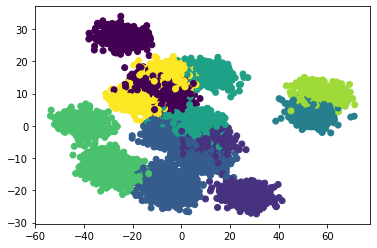

In [21]:
kmeans = KMeans(random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

ทำการหาจำนวนกลุ่มที่เหมาะสมต่อการแบ่งกลุ่ม หรือทำการหาค่า k ที่เหมาะสมของ data 

ใช้วิธีการหาค่า k ด้วยวิธี  _" The elbow method "_

In [ ]:
#เริ่มแรกทำการคำนวนค่า SSE ของ data
kmeans.inertia_ ##ค่าของ SSE Sum of Squared error

In [ ]:
SSE = list()
for k in [1,2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters = k , random_state = 2021)
    XX = kmeans.fit(Data)
    SSE.append(kmeans.inertia_)

In [ ]:
SSE

In [ ]:
#ทำการนำค่า SSE ที่ได้มา plot กราฟเพื่อดูว่ามีกี่ k กลุ่ม
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-b')
plt.xlabel('k')
plt.ylabel('SSE');

In [ ]:
จากกราฟจะบอกได้ว่า k มีทั้งหมด 3 กลุ่ม ดูจากจุดที่ k ที่

ใช้วิธีการหาค่า k ด้วยวิธี  _" The silhouette coefficient "_

In [ ]:
#import function metrics มาใช้
from sklearn import metrics

In [ ]:
SilH = list()
for k in [2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters = k , random_state = 2021)
    kmeans.fit(Data)
    score = metrics.silhouette_score(Data,kmeans.labels_)
    SilH.append(score)

In [ ]:
plt.plot([2,3,4,5,6,7,8],SilH,'o-g')
plt.xlabel('k')
plt.ylabel('SilH');

จากกราฟจะบอกได้ว่า k มีทั้งหมด 3 กลุ่ม